# Client type behaviours in Ford GoBike System
## by Ahmad ALMosallam

## Investigation Overview

I will compare the two types of Client in Ford GoBike System Dateset, customers and subscribers, in the following features:

- Distance travel
- Rental Access Method (App or Clipper)
- Trip duration
- Day

## Dataset Overview

Ford GoBike System Dateset is a dateset that contains trip data from lyft's bike service for public use. Variables including, trip duration, start time and end time with date, start station and end station names, start and end coordinates, customer type, Rental Access Method.

In [37]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [38]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('slide_deck.csv')
df.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,rental_access_method,distance,day
0,1600,2020-01-18 19:03:45,2020-01-18 19:30:25,37.275290,-121.891857,37.280270,-121.908048,Customer,app,1825.0,Saturday
1,1938,2020-01-25 17:32:53,2020-01-25 18:05:12,37.279192,-121.835867,37.259106,-121.831157,Customer,app,1290.0,Saturday
2,2007,2020-01-25 17:33:13,2020-01-25 18:06:40,37.279202,-121.835868,37.258978,-121.831147,Customer,app,1298.0,Saturday
3,567,2020-01-29 15:32:04,2020-01-29 15:41:32,37.282298,-121.838755,37.292066,-121.832024,Customer,app,943.0,Wednesday
4,1107,2020-01-30 17:41:38,2020-01-30 18:00:05,37.283072,-121.832709,37.304321,-121.860995,Customer,app,3384.0,Thursday


## Number of Subscribers and Customers

In this dataset the number of subscribers is more than the customers.

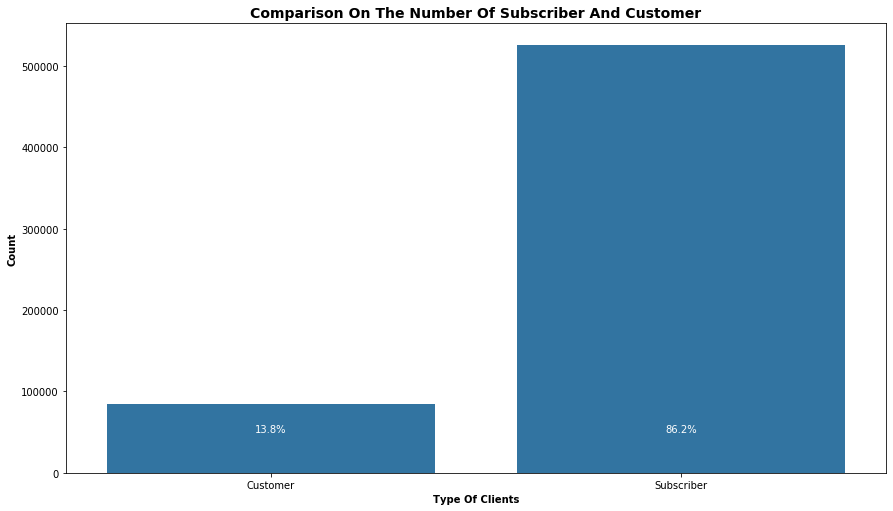

In [39]:
# Plot of the type of users
plt.figure(figsize=[14.70 , 8.27]);
type_user = df.user_type.value_counts()
sb.countplot(data = df , x = 'user_type' , color = sb.color_palette()[0]);
plt.title('comparison on the number of Subscriber and customer'.title() , fontsize=14 , weight = 'bold');
plt.ylabel('Count'.title() , fontsize=10 , weight = 'bold')
plt.xlabel('Type of clients'.title() , fontsize=10 , weight = 'bold');
locs, labels = plt.xticks() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_user[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])

    # print the annotation just below the top of the bar
    plt.text(loc, 50000, pct_string, ha = 'center', color = 'w');

## Clients VS Duration

Subscribers are more likey to spend less time on the trips, while customers are more likey to spend more time on the trips.

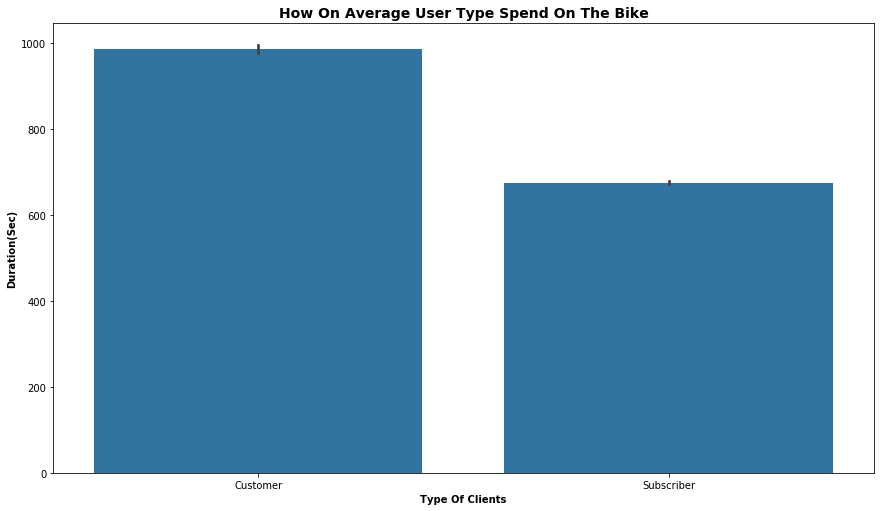

In [40]:
plt.figure(figsize=[14.70 , 8.27]);
sb.barplot(data = df.query("distance <= 2133+ 1.5*1247"),x = 'user_type',y='duration_sec',
               color = sb.color_palette()[0]);
plt.title('How on average user type spend on the bike'.title() , fontsize=14 , weight = 'bold');
plt.xlabel('Type of clients'.title() , fontsize=10 , weight = 'bold');
plt.ylabel('Duration(sec)'.title() , fontsize=10 , weight = 'bold');

## User type VS Rental Access Method

Most of the customers use app method and a slight of them use clipper method, also the same for subscribers, most of them use app method.

It tends to the clients to use the app method than the clipper method

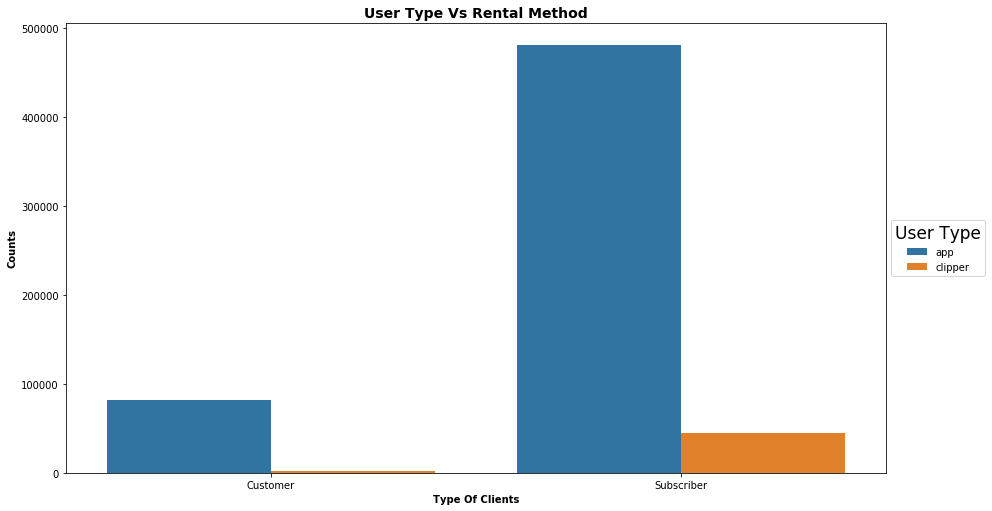

In [48]:
plt.figure(figsize=[14.70 , 8.27]);
sb.countplot(data = df , x = 'user_type' , hue='rental_access_method');
plt.title('User type VS Rental Method'.title() , fontsize=14 , weight = 'bold');
plt.xlabel('Type of clients'.title() , fontsize=10 , weight = 'bold');
plt.ylabel('Counts'.title() , fontsize=10 , weight = 'bold');
plt.legend(loc ='center left' , bbox_to_anchor=(1,0.5) , title='User Type' , title_fontsize = 17);

# Client VS Distance VS Day


Customers have longer trips than subscribers on all the days, which means they have longer trips than the subscribers in overall.

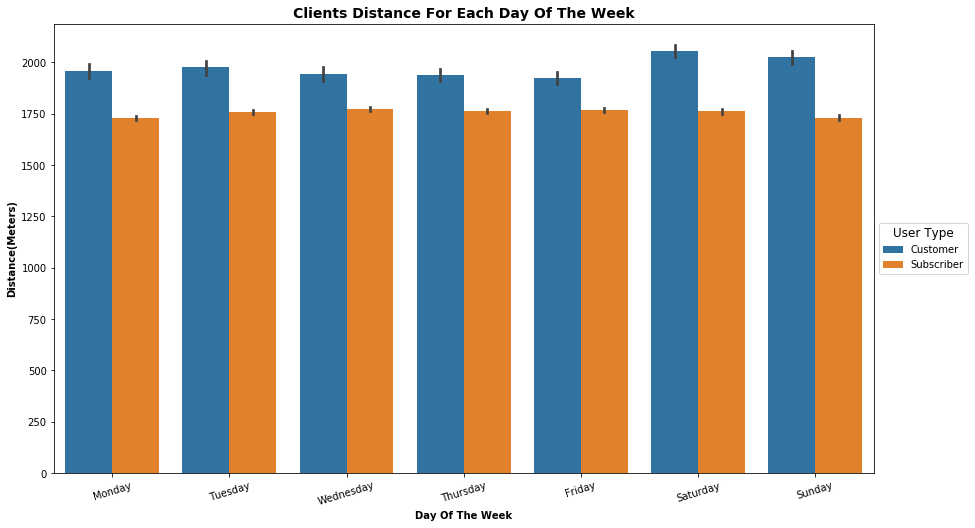

In [43]:
# List of days in order
day_order = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
# create ordered categorical variable
df['day'] = pd.Categorical(df['day'],
                           categories= day_order,
                           ordered = True)
plt.figure(figsize=[14.70 , 8.27])
sb.barplot(data=df , x = 'day' , y = 'distance' , hue = 'user_type');
plt.xticks(rotation = 17);
plt.legend(loc ='center left' , bbox_to_anchor=(1,0.5) , title='User Type' , title_fontsize = 12);
plt.xlabel('Day Of The Week'.title() , fontsize=10 , weight = 'bold')
plt.ylabel('Distance(Meters)'.title() , fontsize=10 , weight = 'bold')
plt.title('Clients distance for each day of the week'.title() , fontsize=14 , weight = 'bold');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!